# Regressão logistica

técnica de ml para classificação. existem tres tipos de regressão logistica

1 - regressao binaria - sim ou não

2 - regressão multinomial - é possivel ter varios valores de classificação

3 - regressão ordinal - é possivel ter varios valores de classificação, mas existe uma ordem(peso) para cada valor de saida.

a regressao logistica utiliza a funcao sigmoide como funcao base para gerar valores para a saida.

sigmoide = 1/ 1+ exp(-x)

In [ ]:
# Sigmoide - exemplo de funcionamentp
import numpy as np

def sigmoid(x):

  return 1/(1+np.exp(-x))

In [ ]:
lista = [1,2,3,0,-2,-5,9,7]

for i in lista:
  print(sigmoid(i))

0.7310585786300049
0.8807970779778823
0.9525741268224334
0.5
0.11920292202211755
0.0066928509242848554
0.9998766054240137
0.9990889488055994


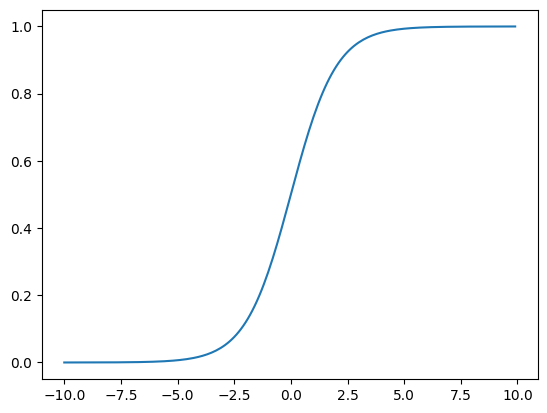

In [ ]:
import matplotlib.pyplot as plt
y = []
x = np.arange(-10,10,0.1)

for i in x:
  y.append(sigmoid(i))

plt.plot(x,y)
plt.show()

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
print("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df

Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]

In [ ]:
df.shape

(768, 9)

In [ ]:
# separar atributos de entrada[features] e atributo de saida(target)

X = df.iloc[:,0:8].values
y = df.iloc[:,8].values



In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train.shape

(576, 8)

In [ ]:
X_test.shape

(192, 8)

In [ ]:
y_train.shape

(576,)

In [ ]:
y_test.shape

(192,)

In [ ]:
# configurar o algoritmo de ML
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
lr .fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predicao = lr.predict(X_test)

In [ ]:
predicao == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm  =confusion_matrix(y_test,predicao)
cm

array([[116,  14],
       [ 25,  37]])

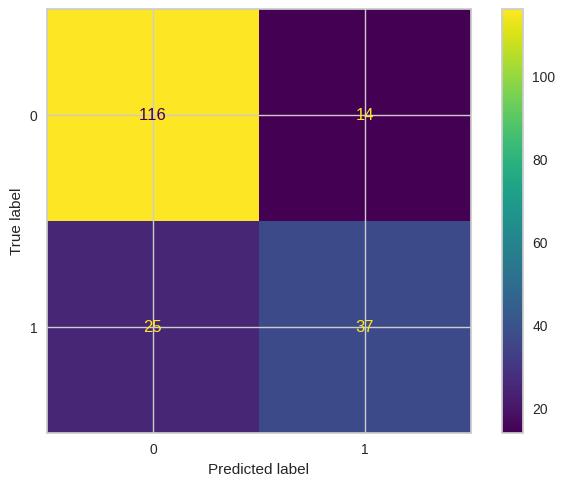

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


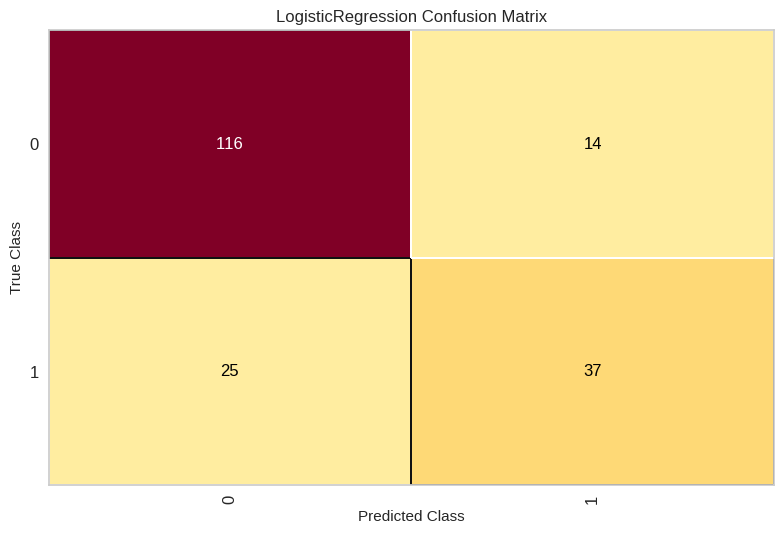

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lr)
#cm.fit(X_train,y_train)
cm.score(X_test,y_test)
cm.poof()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicao))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       130
           1       0.73      0.60      0.65        62

    accuracy                           0.80       192
   macro avg       0.77      0.74      0.76       192
weighted avg       0.79      0.80      0.79       192



In [ ]:
lr.intercept_

array([-8.51044645])

In [ ]:
lr.coef_

array([[ 0.10342628,  0.03481249, -0.01160058,  0.00958434, -0.0013318 ,
         0.07782964,  1.26848941,  0.02162266]])

# KNN

algoritmo de aprendizado de maquina preguicoso, ou seja, há a necessidade de se ter os dados toda a vez que usar o algoritmo.

o knn é baseado em tecnicas de calculo de distancias. A distancia é calculada com gase nos vizinhos mais proximos.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)
print("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

Path to dataset files: /kaggle/input/pima-indians-diabetes-database
/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset= pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
dataset

Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]

In [ ]:
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values


In [ ]:
X.shape, y.shape

((768, 8), (768,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predicoes = knn.predict(X_test)

In [ ]:
predicoes

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
predicoes

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y_test

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
predicoes == y_test

array([False,  True, False, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True,  True,
        True, False,

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicoes)
print(cm)

[[101  23]
 [ 36  32]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicoes)

0.6927083333333334

## knn vs regressao logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predicoes_lr = lr.predict(X_test)

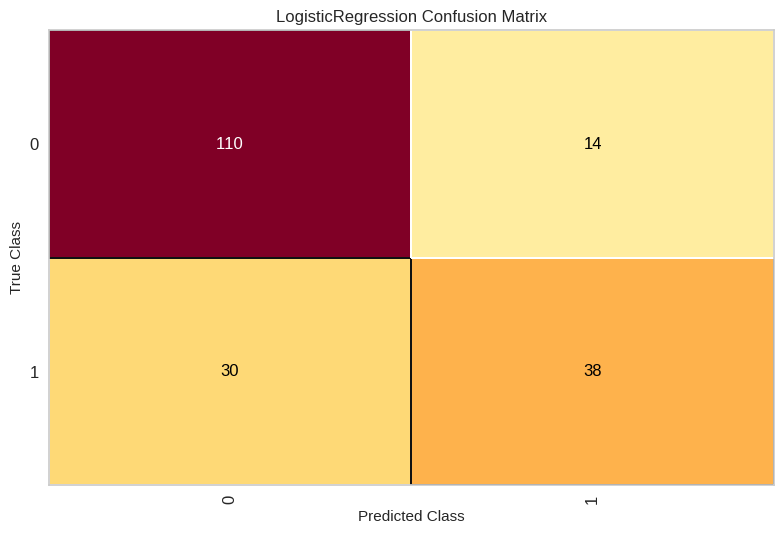

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cmlr = ConfusionMatrix(lr)
cmlr.fit(X_train,y_train)
cmlr.score(X_test,y_test)
cmlr.poof();

In [ ]:
print(accuracy_score(y_test, predicoes_lr))

0.7708333333333334


## dataset cancer de mama - knn vs reg_log

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)
#print("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


In [ ]:
import os
os.listdir('/root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1')

['breast-cancer.csv']

In [ ]:
!ls

sample_data


In [ ]:
import pandas as pd

data_set = pd.read_csv(f'/root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1/breast-cancer.csv')
data_set.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
data_set.shape

(569, 32)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
X = data_set.iloc[:, 2:].values
y = data_set.iloc[:, 1].values

In [ ]:

X.shape, y.shape

((569, 30), (569,))

In [ ]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [ ]:
X_treino.shape, X_teste.shape

((426, 30), (143, 30))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_treino, y_treino)


KNeighborsClassifier()

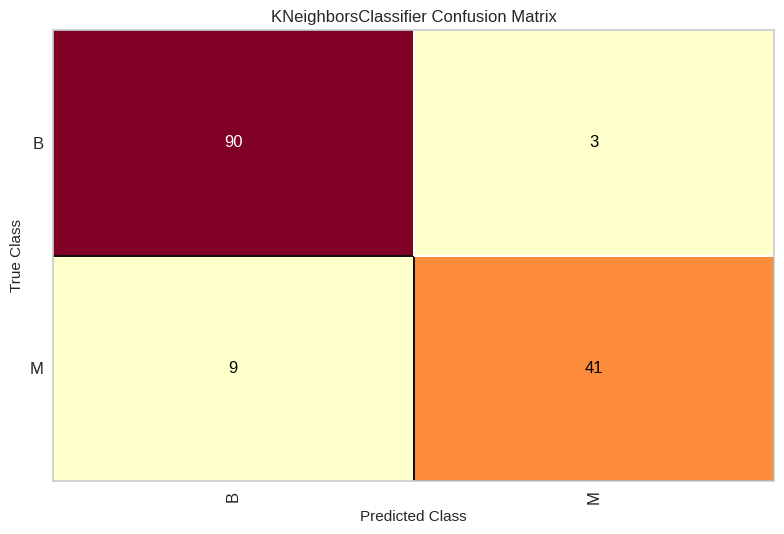

In [ ]:
from yellowbrick.classifier import confusion_matrix

cm = confusion_matrix(knn, X_teste, y_teste)

In [ ]:

from sklearn.metrics import accuracy_score

predicoes = knn.predict(X_teste)
ac = accuracy_score(y_teste, predicoes)

print(ac)

0.916083916083916


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, predicoes))

              precision    recall  f1-score   support

           B       0.91      0.97      0.94        93
           M       0.93      0.82      0.87        50

    accuracy                           0.92       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.92      0.92      0.91       143



###  regressao logistica


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [ ]:
lr.fit(X_treino, y_treino)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predicoes_lr = lr.predict(X_teste)


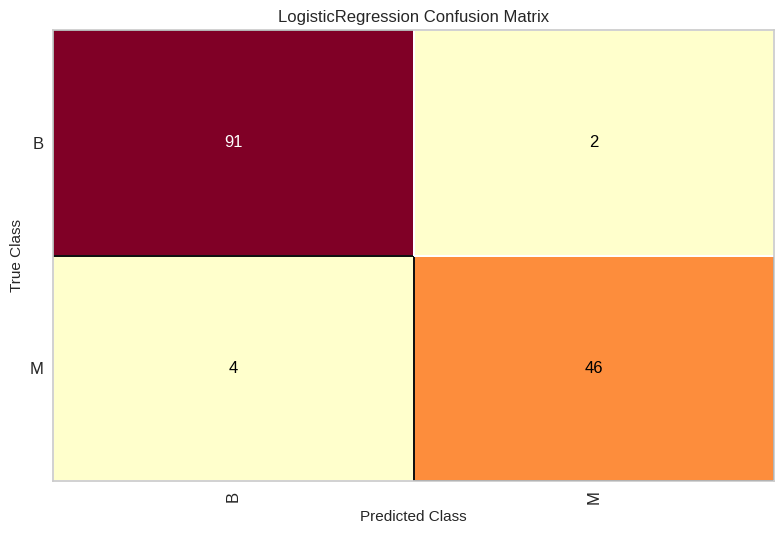

In [ ]:
cm_lr = confusion_matrix(lr, X_teste, y_teste)


In [ ]:
print(accuracy_score(y_teste, predicoes_lr))


0.958041958041958


In [ ]:
print(classification_report(y_teste, predicoes_lr))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97        93
           M       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



# Arvore de Decisao

essa tecnica serve tanto para classificacao como para regressao. a estrutura basica é uma rvore binaria.

o processo de treinamento consiste em elaborar uma arvore contendo:
no raiz, nos internos(nos de decisao), nos folhas.

um no folha é a resposta do modelo

2 estrategias para posicionamento do no de decisao:

1 - entropia

2 - indice de gini



In [ ]:
import pandas as pd

In [ ]:
esportes = ["futebol", "volei" , "atletismo"]

In [ ]:
altura = [2.00, 1.50, 1.65,1.70,1.75,2.09,1.69,1.85,1.90,1.58]

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
arvore = DecisionTreeClassifier(criterion="entropy")



In [ ]:
X = dados.iloc[:, 0:2].values
y = dados.iloc[:,2].values

In [ ]:
arvore.fit(X,y)

In [ ]:
from sklearn import tree

In [ ]:
tree.plot_tree(arvore,filled=True,feature_names=["Altura","Idade"], )



## teste arvore doenca cancer com arvore de decisao


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)
#print("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

100%|██████████| 48.6k/48.6k [00:00<00:00, 2.62MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


In [ ]:
import pandas as pd

data_set = pd.read_csv(f'/root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1/breast-cancer.csv')
data_set.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
# saida classes

y = data_set.iloc[:, 1].values


In [ ]:
# entrada de dados - atributos - preditores
X = data_set.iloc[:,2:32].values

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, random_state=20)

In [ ]:
X_treino.shape, X_teste.shape , y_treino.shape, y_teste.shape

((426, 30), (143, 30), (426,), (143,))

In [ ]:
arvore_cancer = DecisionTreeClassifier(criterion="entropy")


In [ ]:
arvore_cancer.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn.metrics import classification_report

predicoes = arvore_cancer.predict(X_teste)

print(classification_report(y_teste, predicoes))

              precision    recall  f1-score   support

           B       0.96      0.95      0.96        86
           M       0.93      0.95      0.94        57

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



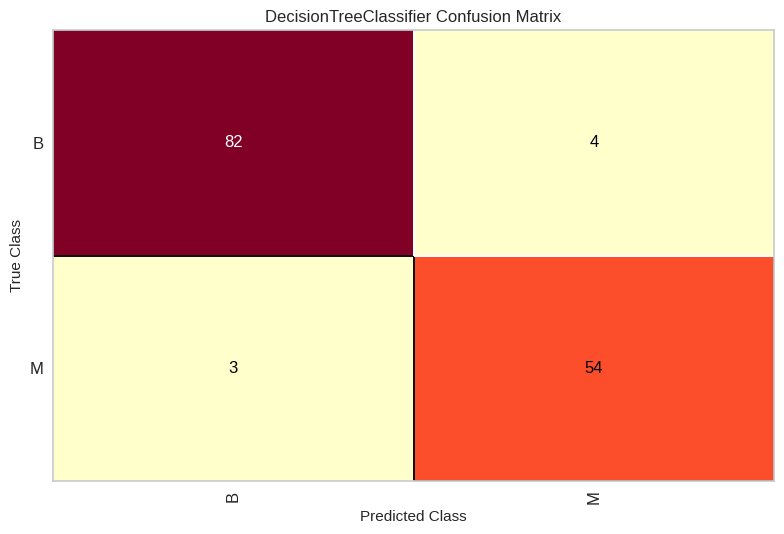

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(arvore_cancer)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)
cm.poof()

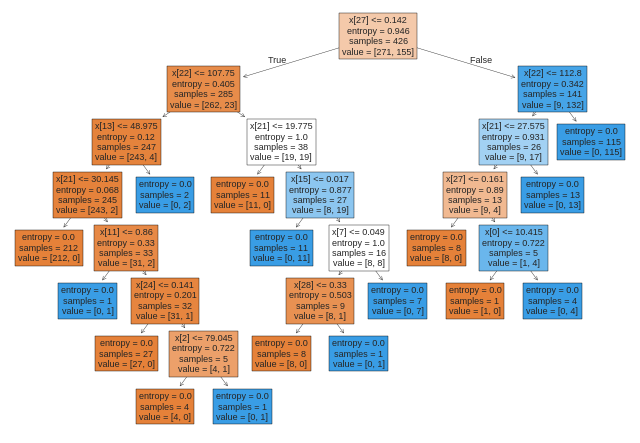

In [ ]:
from sklearn import tree
tree.plot_tree(arvore_cancer,filled=True);



## teste arvore mama

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt


# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)
#print("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")





dados = pd.read_csv(f'/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
dados.head()

Path to dataset files: /kaggle/input/breast-cancer-dataset


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
X = dados.iloc[:, 2:-1].values
Y = dados.iloc[:, 1].values

In [ ]:
X.shape, Y.shape

((569, 29), (569,))

In [ ]:
X

array([[ 17.99  ,  10.38  , 122.8   , ...,   0.7119,   0.2654,   0.4601],
       [ 20.57  ,  17.77  , 132.9   , ...,   0.2416,   0.186 ,   0.275 ],
       [ 19.69  ,  21.25  , 130.    , ...,   0.4504,   0.243 ,   0.3613],
       ...,
       [ 16.6   ,  28.08  , 108.3   , ...,   0.3403,   0.1418,   0.2218],
       [ 20.6   ,  29.33  , 140.1   , ...,   0.9387,   0.265 ,   0.4087],
       [  7.76  ,  24.54  ,  47.92  , ...,   0.    ,   0.    ,   0.2871]])

In [ ]:
Y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,Y)

hold out

leave one out

cross validation

In [ ]:
X_treino.shape, X_teste.shape

((426, 29), (143, 29))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(criterion="gini")

max_depth=3

In [ ]:
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [ ]:
predicoes = arvore.predict(X_teste)

In [ ]:
arvore.score(X_teste,y_teste)

0.9440559440559441

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, predicoes))

              precision    recall  f1-score   support

           B       0.99      0.96      0.97        79
           M       0.95      0.98      0.97        64

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
X_teste[0] , y_teste[0]

(array([1.246e+01, 1.283e+01, 7.883e+01, 4.773e+02, 7.372e-02, 4.043e-02,
        7.173e-03, 1.149e-02, 1.613e-01, 6.013e-02, 3.276e-01, 1.486e+00,
        2.108e+00, 2.460e+01, 1.039e-02, 1.003e-02, 6.416e-03, 7.895e-03,
        2.869e-02, 4.821e-03, 1.319e+01, 1.636e+01, 8.324e+01, 5.340e+02,
        9.439e-02, 6.477e-02, 1.674e-02, 2.680e-02, 2.280e-01]),
 'B')

In [ ]:
arvore.predict([X_teste[0]])


array(['B'], dtype=object)

In [ ]:
arvore.predict_proba([X_teste[0]])


array([[1., 0.]])

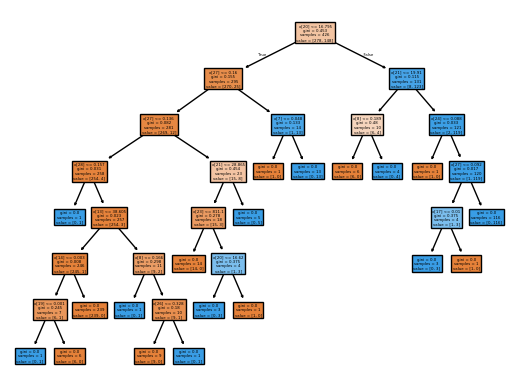

In [ ]:
from sklearn import tree
tree.plot_tree(arvore,filled=True);



# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross = cross_val_score(arvore, X_treino, y_treino,  cv=5)

In [ ]:
cross

array([0.91860465, 0.91764706, 0.94117647, 0.84705882, 0.92941176])

In [ ]:
arvore.set_params(criterion="gini", max_depth=3)

DecisionTreeClassifier(max_depth=3)

## grid search

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parametros = {"criterion":["entropy","gini"],
              "max_depth": [ 3, 4, 5 ],
              "min_samples_split" : [2,3,4]
              }

In [ ]:
gscv = GridSearchCV(arvore, parametros, cv=10)

In [ ]:
gscv.fit(X_treino, y_treino)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
gscv.best_score_

np.float64(0.924640088593577)

In [ ]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3}

## teste com knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt


# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

dados = pd.read_csv(f'/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
dados.head()

Path to dataset files: /kaggle/input/breast-cancer-dataset


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
X = dados.iloc[:, 2:].values
y = dados.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,Y)

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {"n_neighbors" : [3,5,7,9,13,15]}

gscv = GridSearchCV(knn, parametros, cv=10)

gscv.fit(X_treino, y_treino)

print(gscv.best_score_)
print(gscv.best_params_)

0.9294019933554818
{'n_neighbors': 7}


## teste com logistic regressos

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='liblinear')

parametros = {"C": np.logspace(-3, 3, 7)}

gscv = GridSearchCV(lr, parametros, cv=10)
gscv.fit(X_treino, y_treino)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [ ]:
print(gscv.best_score_)
print(gscv.best_params_)

0.9482834994462902
{'C': np.float64(1000.0)}


# Regressao linear

* tipos de regressão:

 regressao simples \\
 regressao composta \\
 regressao polinomial \\

In [ ]:
import random
import matplotlib.pyplot as plt

X =[random.randint(10,20) for i in range(10)]
y = [random.randint(10,20) for i in range(10)]


In [ ]:
X

[17, 16, 15, 18, 18, 13, 14, 11, 14, 15]

In [ ]:
y

[12, 15, 14, 15, 18, 16, 11, 11, 19, 10]

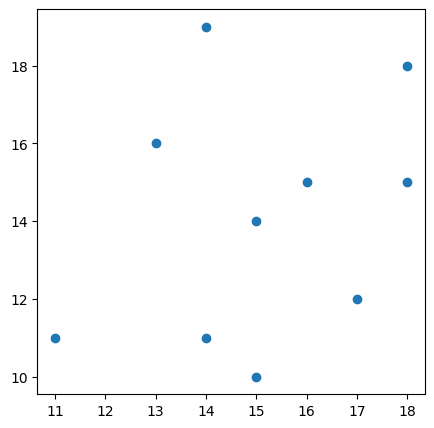

In [ ]:
graf = plt.figure(figsize=(5,5))
plt.scatter(X,y)

plt.show()

In [ ]:
x_pol = [i for i in range(1,10)]

In [ ]:
y_pol = [i**2 for i in range(1,10)]

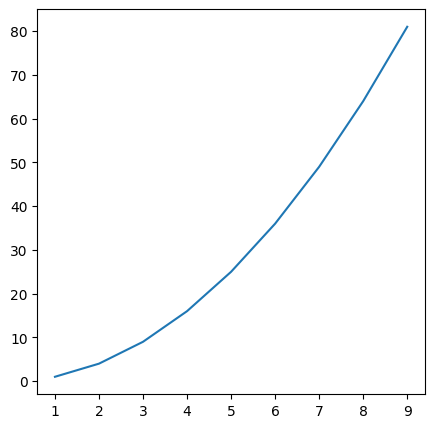

In [ ]:
graf = plt.figure(figsize=(5,5))

plt.plot(x_pol, y_pol)


plt.show()

## analise exploratoria de dados

In [ ]:
import pandas as pd


In [ ]:
dados = pd.DataFrame({"Idade" : [20,35, 33, 22,50],
                      "Experiencia" : [3,15,10, 10,30],
                      "Salario" : [10000,18000,15000,13000,20000]})

In [ ]:
dados.head()

Idade  Experiencia  Salario
0     20            3    10000
1     35           15    18000
2     33           10    15000
3     22           10    13000
4     50           30    20000

In [ ]:
dados.describe()

Idade  Experiencia       Salario
count   5.000000     5.000000      5.000000
mean   32.000000    13.600000  15200.000000
std    12.020815    10.114346   3962.322551
min    20.000000     3.000000  10000.000000
25%    22.000000    10.000000  13000.000000
50%    33.000000    10.000000  15000.000000
75%    35.000000    15.000000  18000.000000
max    50.000000    30.000000  20000.000000

In [ ]:
dados.corr()

Idade  Experiencia   Salario
Idade        1.000000     0.943802  0.939527
Experiencia  0.943802     1.000000  0.913258
Salario      0.939527     0.913258  1.000000

In [ ]:
# correçalao = covariancia/ std(x) * std(y)
# covariancia = somatorio (xi - xi~) * (yi - yi~)/x-1

<Axes: >

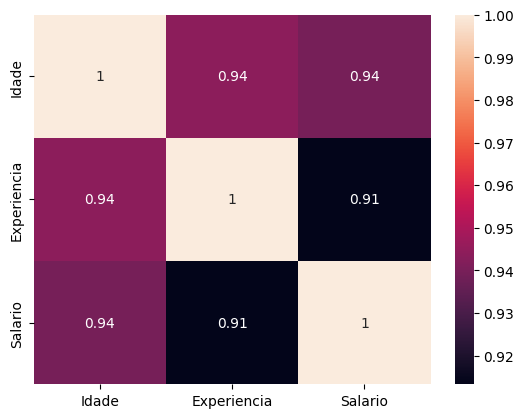

In [ ]:
import seaborn as sns

sns.heatmap(dados.corr(), annot=True)

In [ ]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)



Path to dataset files: /kaggle/input/california-housing-prices


In [ ]:
preco_casas = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
preco_casas.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
preco_casas.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
import numpy as np
print(preco_casas.isna().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
preco_casas["total_bedrooms"].mean()

np.float64(537.8705525375618)

In [ ]:
preco_casas["total_bedrooms"] = preco_casas["total_bedrooms"].fillna(preco_casas["total_bedrooms"].mean())

In [ ]:
preco_casas.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
preco_casas.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
preco_casas["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
lbc = LabelEncoder()

In [ ]:
resultado = lbc.fit_transform(preco_casas["ocean_proximity"])

In [ ]:
preview = pd.DataFrame(resultado, columns=["ocean_proximity"])
preview.value_counts()

ocean_proximity
0                  9136
1                  6551
4                  2658
3                  2290
2                     5
Name: count, dtype: int64

In [ ]:
preco_casas["ocean_proximity"] = resultado


In [ ]:
preco_casas.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                3  
1      2401.0      1138.0         8.3014            358500.0                3  
2       496.0       177.0         7.2574            352100.0                3  
3       558.0       219.0         5.6431            341300.0                3  
4       565.0       259.0         3.8462            342200.0                3

In [ ]:
import seaborn as sns

sns.heatmap(preco_casas.corr(), annot=True)

In [ ]:
# excluir atributos longitude latidudade housing_median_age
preco_casas = preco_casas.drop(["longitude", "latitude", "housing_median_age"], axis=1)

In [ ]:
preco_casas = preco_casas.drop(["ocean_proximity"], axis=1)

In [ ]:
preco_casas.corr()

total_rooms  total_bedrooms  population  households  \
total_rooms            1.000000        0.927253    0.857126    0.918484   
total_bedrooms         0.927253        1.000000    0.873910    0.974725   
population             0.857126        0.873910    1.000000    0.907222   
households             0.918484        0.974725    0.907222    1.000000   
median_income          0.198050       -0.007682    0.004834    0.013033   
median_house_value     0.134153        0.049454   -0.024650    0.065843   

                    median_income  median_house_value  
total_rooms              0.198050            0.134153  
total_bedrooms          -0.007682            0.049454  
population               0.004834           -0.024650  
households               0.013033            0.065843  
median_income            1.000000            0.688075  
median_house_value       0.688075            1.000000

<Axes: >

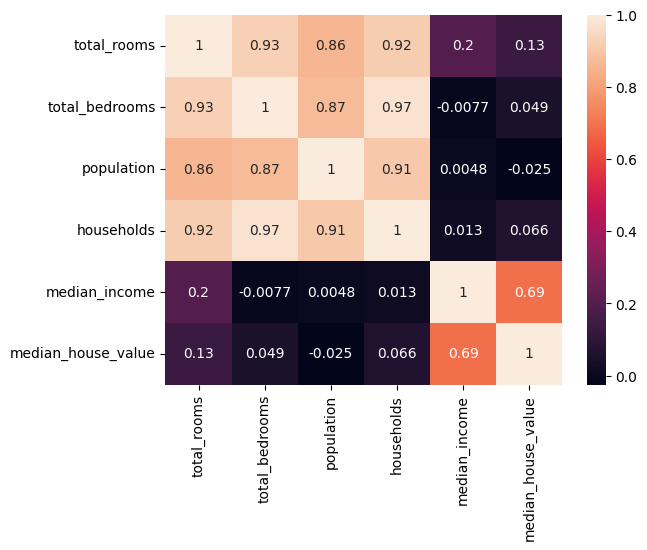

In [ ]:
import seaborn as sns

sns.heatmap(preco_casas.corr(), annot=True)

separacao dos atributos (x) e a variavel dependente (y)

In [ ]:
y = preco_casas["median_house_value"]


In [ ]:
y = preco_casas.iloc[: ,-1].values
y[0]

np.float64(452600.0)

In [ ]:
X = preco_casas.iloc[:, 0:5].values



In [ ]:
X[[0]]

array([[880.    , 129.    , 322.    , 126.    ,   8.3252]])

In [ ]:
# Separar registros de treino e teste

from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, random_state=25)

In [ ]:
X_treino.shape, X_teste.shape , y_treino.shape, y_teste.shape

((15480, 5), (5160, 5), (15480,), (5160,))

## casas california

### regressao linear

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [ ]:
lr.fit(X_treino,y_treino)

LinearRegression()

In [ ]:
lr.intercept_

np.float64(19769.811174103088)

In [ ]:
lr.coef_

array([-2.33580224e+01,  6.65851191e+01, -3.56950766e+01,  1.64100539e+02,
        4.68549398e+04])

In [ ]:
lr.score(X_teste, y_teste)

0.531182987181873

In [ ]:
lr.predict([X_teste[0]])

array([43684.83215872])

In [ ]:
y_teste[0]

np.float64(67500.0)

In [ ]:
from sklearn.metrics import mean_squared_error

predicoes_lr = lr.predict(X_teste)

mse = mean_squared_error(y_teste, predicoes_lr)
mse**(1/2)

78389.13963742231

### arvore de decisao - regressao

In [ ]:
from sklearn.tree import DecisionTreeRegressor

arvore = DecisionTreeRegressor()

In [ ]:
arvore.fit(X_treino, y_treino)

DecisionTreeRegressor()

In [ ]:
arvore.score(X_teste, y_teste)

0.26057865853870044

In [ ]:
arvore.predict(X_teste[0].reshape(1,-1))


array([162500.])

In [ ]:
y_teste[0]

np.float64(67500.0)

### knn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [ ]:
knn.fit(X_treino, y_treino)

KNeighborsRegressor()

In [ ]:
knn.score(X_teste, y_teste)

0.21796395411248104

In [ ]:
knn.predict(X_teste[0].reshape(1,-1))

array([202000.])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [ ]:
rf.fit(X_treino, y_treino)

RandomForestRegressor()

In [ ]:
rf.score(X_teste, y_teste)

0.6161180611997875

#

aprendizado não supervisionado

considera dados não rotulados ou que nao tenha valor para aproximação, como é o caso dos algoritmos de aprendizado supervisionado (classificação e regressão )


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=10000, centers=10, random_state=42)

In [ ]:
X

array([[-3.78461285,  0.70999334],
       [ 5.60018363,  2.43565331],
       [-4.05974191,  2.31848759],
       ...,
       [-3.15847517,  7.79034586],
       [ 1.48082723,  4.05944528],
       [-3.15984019,  8.52716074]])

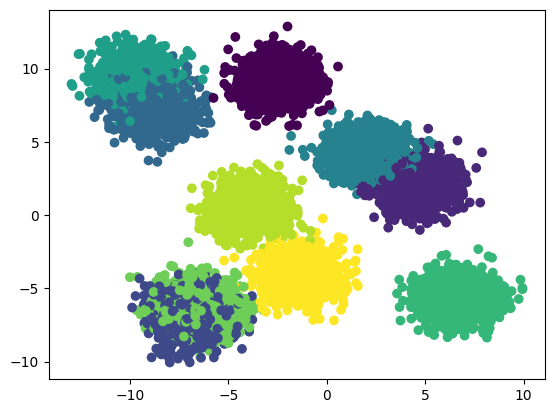

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1],c=y)

plt.show()

In [ ]:
y

array([8, 1, 8, ..., 0, 4, 0])

In [ ]:
import plotly.express as px

fig = px.scatter(x=X[:,0], y=X[:,1],color=y)
fig.show()

# aprendizado não supervisionado

## introducao

k means


--------------------------------
 k = numero de clusters --> agrupamento de dados

 means =

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters=10)

In [ ]:
k_means.fit(X)

KMeans(n_clusters=10)

In [ ]:
k_means.labels_

array([4, 8, 4, ..., 3, 2, 3], dtype=int32)

In [ ]:
type(k_means)

sklearn.cluster._kmeans.KMeans

In [ ]:
labels = k_means.labels_

In [ ]:
k_means.inertia_

18012.305701444573

In [ ]:
X[10]

array([-5.75735096, -7.80752255])

In [ ]:
y[10]

np.int64(7)

In [ ]:
k_means.predict([X[10]])


array([9], dtype=int32)

## plots

In [ ]:
labels = k_means.labels_

In [ ]:
centro = k_means.cluster_centers_

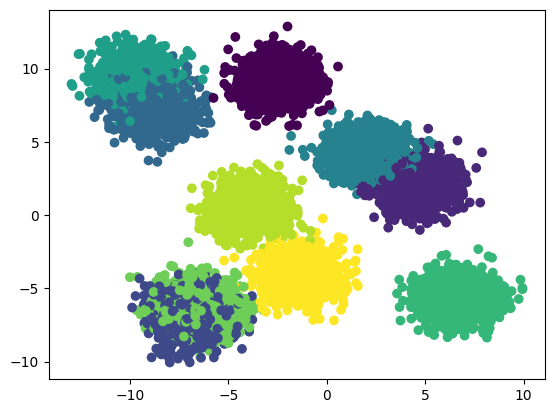

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

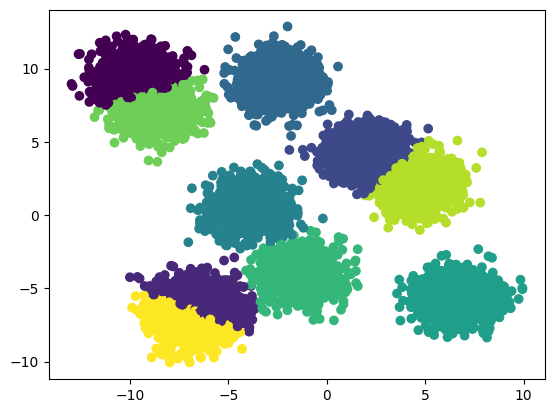

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=labels)
plt.show()

In [ ]:
import pandas as pd
figura1= px.scatter(x=X[:,0], y=X[:,1], color=labels)

centro_df = pd.DataFrame(centro, columns=['x', 'y'])

figura2 = px.scatter(centro_df, x='x', y='y', size=[10]*len(centro_df)) # Adjust size here

figura2.update_traces(
    marker=dict(
        size=25,               # aumenta o diâmetro do ponto
        line=dict(
            width=3,           # espessura da borda do marcador
            color='DarkSlateGrey'  # cor da borda (opcional)
        )
    )
)

figura1.show()
figura2.show()

In [ ]:
import plotly.graph_objects as go

figura3 = go.Figure(data= figura1.data + figura2.data)
figura3.show()

In [ ]:
import plotly.graph_objects as go

# -------------------------------------------------------------------
# 1) Cria figura3 “vazia” e adiciona, primeiro, todos os traces de figura1
# -------------------------------------------------------------------
figura3 = go.Figure()

for trace in figura1.data:
    figura3.add_trace(trace)

# -------------------------------------------------------------------
# 2) Depois, adiciona todos os traces de figura2
# -------------------------------------------------------------------
#    Assim, eles ficarão desenhados por cima dos anteriores.
for trace in figura2.data:
    figura3.add_trace(trace)

# -------------------------------------------------------------------
# 3) Ajusta visibilidade: torna figura1 mais “embaçada” (opacidade menor)
#    e reforça conteúdo de figura2 (tamanho, borda, símbolo etc.)
# -------------------------------------------------------------------
num_traces_fig1 = len(figura1.data)
total_traces   = len(figura3.data)

# 3.1) Deixa pontos de figura1 semi-transparentes (opcional)
for i in range(num_traces_fig1):
    figura3.data[i].marker.opacity = 0.1  # valor entre 0 e 1

# 3.2) Aumenta tamanho / borda e muda símbolo de figura2
for i in range(num_traces_fig1, total_traces):
    figura3.data[i].marker.size = 25              # maior diâmetro
    figura3.data[i].marker.line = dict(
        width=3,                                  # borda mais grossa
        color='DarkSlateGray'                     # cor da borda (opcional)
    )
    figura3.data[i].marker.symbol = 'star'        # muda símbolo (exemplo: estrela)
    figura3.data[i].marker.opacity = 1.0          # garante que estão 100% visíveis

figura3.show()


## KMeans

clusteriza os dados com base nas medidas de distancia

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

X_blobs, y_blobs = make_blobs(n_samples=100, centers=3, random_state=42)

In [ ]:
y_blobs

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

In [ ]:
import plotly.express as px

fig = px.scatter(x=X_blobs[:,0], y=X_blobs[:,1], color=y_blobs)

In [ ]:
fig.show()

In [ ]:
kmeans_blobs = KMeans(n_clusters=3)
kmeans_blobs.fit(X_blobs)

KMeans(n_clusters=3)

In [ ]:
labels_k_blobs = kmeans_blobs.labels_
labels_k_blobs

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0], dtype=int32)

In [ ]:
centroides = kmeans_blobs.cluster_centers_
centroides

array([[-2.66780392,  8.93576069],
       [-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013]])

In [ ]:
import plotly.graph_objects as go


In [ ]:
fig1 = px.scatter(x=X_blobs[:,0], y=X_blobs[:,1], color=labels_k_blobs)
fig2 = px.scatter(x=centroides[:,0], y=centroides[:,1], size=[7,7,7])
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

## DBSCAN

 (density-based spatial clustering of applications with noise)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan_blobs = DBSCAN(eps=2, min_samples=5)

In [ ]:
dbscan_blobs.fit(X_blobs)

DBSCAN(eps=2)

In [ ]:
labels_db_blobs = dbscan_blobs.labels_
labels_db_blobs

array([0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2])

In [ ]:
import numpy as np
np.unique_counts(labels_db_blobs)

UniqueCountsResult(values=array([0, 1, 2]), counts=array([33, 33, 34]))

In [ ]:
import plotly.express as px

fig1 = px.scatter(x=X_blobs[:,0], y=X_blobs[:,1], color=labels_db_blobs
)
#fig2 = px.scatter(x=centroides[:,0], y=centroides[:,1], size=[7,7,7])
#fig3 = go.Figure(data=fig1.data + fig2.data)
fig1.show()

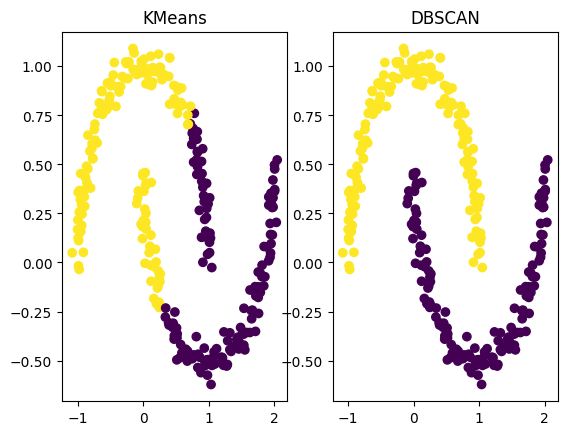

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN

X, _ = make_moons(n_samples=300, noise=0.05)

# KMeans
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.subplot(1,2,1)
plt.title("KMeans")
plt.scatter(X[:,0], X[:,1], c=y_kmeans)

plt.subplot(1,2,2)
plt.title("DBSCAN")
plt.scatter(X[:,0], X[:,1], c=y_dbscan)

plt.show()


## casas

In [ ]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)


preco_casas = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
preco_casas.head()


Path to dataset files: /kaggle/input/california-housing-prices


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
import plotly.express as px

# Certifique-se de que não há valores ausentes em longitude e latitude
print(preco_casas[['longitude', 'latitude']].isnull().sum())

# Crie o gráfico de dispersão com longitude e latitude
fig = px.scatter(preco_casas, x="longitude", y="latitude",
                 color="median_house_value", # Cor por valor mediano da casa
                 title="Mapa de Longitude e Latitude com Valor Mediano da Casa")
fig.show()

longitude    0
latitude     0
dtype: int64


In [ ]:
X = preco_casas.iloc[:,0:2].values
X

array([[-122.23,   37.88],
       [-122.22,   37.86],
       [-122.24,   37.85],
       ...,
       [-121.22,   39.43],
       [-121.32,   39.43],
       [-121.24,   39.37]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.32783522,  1.05254828],
       [-1.32284391,  1.04318455],
       [-1.33282653,  1.03850269],
       ...,
       [-0.8237132 ,  1.77823747],
       [-0.87362627,  1.77823747],
       [-0.83369581,  1.75014627]])

In [ ]:
kmeans_casas = KMeans(n_clusters=3,random_state=0)
kmeans_casas.fit(X_scaled)



KMeans(n_clusters=3, random_state=0)

In [ ]:
labels_kmeans_casas = kmeans_casas.labels_
labels_kmeans_casas

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
centroides_casas = kmeans_casas.cluster_centers_
centroides_casas

array([[ 0.84092258, -0.84608743],
       [-0.070718  ,  0.17339485],
       [-1.17889101,  1.16180951]])

In [ ]:
fig = px.scatter(x=X_scaled[:,0], y=X_scaled[:,1], color=labels_kmeans_casas)

fig.show()

## dbscan casas

In [ ]:
from sklearn.cluster import DBSCAN
db_scan_casas = DBSCAN(eps=0.1)

In [ ]:
db_scan_casas.fit(X_scaled)

DBSCAN(eps=0.1)

In [ ]:
import plotly.express as px
fig = px.scatter(x=X_scaled[:,0], y=X_scaled[:,1], color=db_scan_casas.labels_)
fig.show()


# reducao de dimensionalidade

In [ ]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)


casas = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
casas.head()


Path to dataset files: /kaggle/input/california-housing-prices


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
casas['total_bedrooms'].fillna(casas['total_bedrooms'].mean(), inplace=True)

<ipython-input-5-3435088162>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  casas['total_bedrooms'].fillna(casas['total_bedrooms'].mean(), inplace=True)


In [ ]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
from sklearn.preprocessing import StandardScaler



In [ ]:
Xx_10 = casas.iloc[:,0:9].values
Xx_10

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [ ]:
Xx_mesma_escala = StandardScaler().fit_transform(Xx_10)
Xx_mesma_escala

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [ ]:
from sklearn.cluster import KMeans
k_means_casas_mesma_escala = KMeans(n_clusters=3,random_state=0)
k_means_casas_mesma_escala.fit(Xx_mesma_escala)

KMeans(n_clusters=3, random_state=0)

In [ ]:
k_means_casas_mesma_escala.labels_

array([2, 1, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
k_means_casas_mesma_escala.cluster_centers_

array([[ 0.78145789, -0.80442688,  0.0855298 , -0.212947  , -0.19517126,
        -0.13727286, -0.19050377,  0.02134363,  0.0669679 ],
       [ 0.19493138, -0.17391426, -0.94683903,  2.37078527,  2.43161542,
         2.25164662,  2.43413286,  0.19042123,  0.14774938],
       [-1.05344035,  1.07894534,  0.08227896, -0.20758818, -0.24305952,
        -0.28143531, -0.24962765, -0.06654527, -0.11701822]])

## metodo de elbow


como descobrir melhor valor para K

numero de clusters = raiz quadrada do numero de amostras divido por 2 = (n**(1/2))  / 2



In [ ]:
# metodo de elbow

inercia = []

n_clusters = []

for i in range(2,11):
    k_means_casas_mesma_escala = KMeans(n_clusters=i,random_state=0)
    k_means_casas_mesma_escala.fit(Xx_mesma_escala)

    inercia.append(k_means_casas_mesma_escala.inertia_)
    n_clusters.append(i)

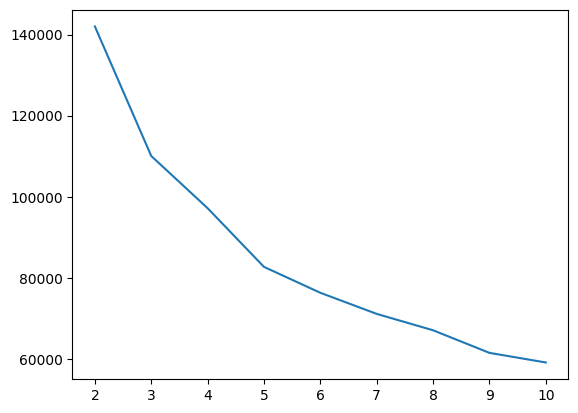

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n_clusters,inercia)
plt.show()

## PCA

In [ ]:
# principal component analysis
from sklearn.decomposition import PCA


In [ ]:
casas_pca = PCA(n_components=4)

X_casas_pca = casas_pca.fit_transform(Xx_mesma_escala)

In [ ]:
X_casas_pca.shape

(20640, 4)

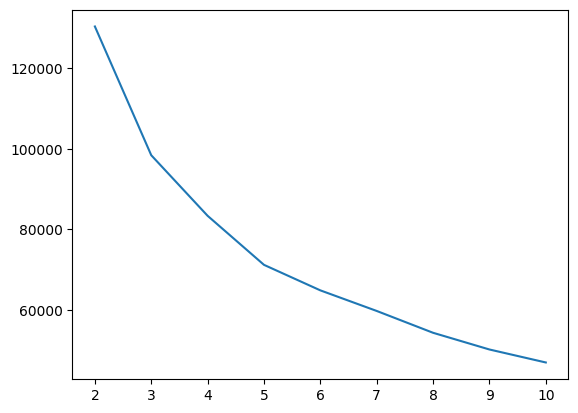

In [ ]:
# metodo de elbow

inercia = []

n_clusters = []

for i in range(2,11):
    k_means_casas_mesma_escala = KMeans(n_clusters=i,random_state=0)
    k_means_casas_mesma_escala.fit(X_casas_pca)

    inercia.append(k_means_casas_mesma_escala.inertia_)
    n_clusters.append(i)



import matplotlib.pyplot as plt

plt.plot(n_clusters,inercia)
plt.show()

## pca kaggle

In [ ]:
import kagglehub


path = kagglehub.dataset_download("madhuraatmarambhagat/crop-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/crop-recommendation-dataset


In [ ]:
import pandas as pd
import numpy as np


dataset = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")
dataset.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
X = dataset.iloc[:,0:7].values
y = dataset.iloc[:,7].values

In [ ]:
y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

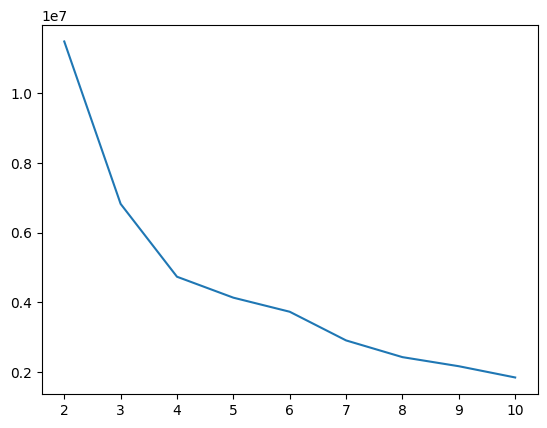

In [ ]:
# principal component analysis
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

agro_pca = PCA(n_components=4)

x_agro_pca = agro_pca.fit_transform(X)


# metodo de elbow

inercia = []

n_clusters = []

for i in range(2,11):
    k_means_agro_pca = KMeans(n_clusters=i,random_state=0)
    k_means_agro_pca.fit(x_agro_pca)

    inercia.append(k_means_agro_pca.inertia_)
    n_clusters.append(i)



import matplotlib.pyplot as plt

plt.plot(n_clusters,inercia)
plt.show()

In [ ]:
import plotly.express as px

k_means_agro_pca = KMeans(n_clusters=4,random_state=0)
k_means_agro_pca.fit(x_agro_pca)

fig = px.scatter(x=X[:,0], y=X[:,1], color=k_means_agro_pca.labels_)
fig.show()


In [ ]:
# principal component analysis
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


agro_pca = PCA(n_components=3)
X_padronizado = StandardScaler().fit_transform(X)
x_agro_pca = agro_pca.fit_transform(X_padronizado)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_blobs = DBSCAN(eps=0.5
                    )

dbscan_blobs.fit(x_agro_pca)




DBSCAN()

In [ ]:
labels_db_blobs = dbscan_blobs.labels_
labels_db_blobs

import numpy as np
np.unique_counts(labels_db_blobs)



UniqueCountsResult(values=array([-1,  0,  1]), counts=array([   9, 1991,  200]))

In [ ]:
import plotly.express as px

fig1 = px.scatter(x=X[:,0], y=X[:,1], color=labels_db_blobs
)
#fig2 = px.scatter(x=centroides[:,0], y=centroides[:,1], size=[7,7,7])
#fig3 = go.Figure(data=fig1.data + fig2.data)
fig1.show()